# Download data and requirements install

In [ ]:
cd /content

/content


In [ ]:
!mv kaggle.json /root/.kaggle/kaggle.json

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
!kaggle competitions download -c home-credit-default-risk -p ./data/raw
!unzip './data/raw/home-credit-default-risk.zip' -d './data/raw'
!rm './data/raw/home-credit-default-risk.zip'

!unzip '/content/data/raw/application_test.csv.zip' -d './data/raw'
!unzip '/content/data/raw/application_train.csv.zip' -d './data/raw'

!rm './data/raw/*.zip'

 99% 267M/271M [00:03<00:00, 79.5MB/s]
100% 271M/271M [00:03<00:00, 80.8MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 165MB/s]
 87% 66.0M/76.3M [00:00<00:00, 70.3MB/s]
100% 76.3M/76.3M [00:00<00:00, 82.5MB/s]
 92% 89.0M/96.7M [00:01<00:00, 62.2MB/s]
100% 96.7M/96.7M [00:01<00:00, 67.7MB/s]
  0% 0.00/5.81M [00:00<?, ?B/s]
100% 5.81M/5.81M [00:00<00:00, 53.1MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 35.9MB/s]
 72% 41.0M/56.8M [00:00<00:00, 52.3MB/s]
100% 56.8M/56.8M [00:00<00:00, 89.6MB/s]
 89% 97.0M/109M [00:02<00:00, 33.8MB/s]
100% 109M/109M [00:02<00:00, 42.6MB/s] 
 90% 33.0M/36.8M [00:00<00:00, 46.5MB/s]
100% 36.8M/36.8M [00:00<00:00, 53.9MB/s]
 91% 33.0M/36.1M [00:00<00:00, 47.5MB/s]
100% 36.1M/36.1M [00:00<00:00, 56.7MB/s]
unzip:  cannot find or open ./data/raw/home-credit-default-risk.zip, ./data/raw/home-credit-default-risk.zip.zip or ./data/raw/home-credit-default-risk.zip.ZIP.
rm: cannot remove './data/raw/home-credit-default-risk.z

In [ ]:
!pip install catboost

In [ ]:
!mkdir notebooks


mkdir: cannot create directory ‘notebooks’: File exists


In [ ]:
cd notebooks

/content/notebooks


# Import, Settings, Load Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, log_loss

sns.set()

## Settings and Load Data

In [ ]:
pd.set_option("max_columns", 300)

In [ ]:
train = pd.read_csv("../data/raw/application_train.csv")
test = pd.read_csv("../data/raw/application_test.csv")

In [ ]:
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Look through dataset

In [ ]:
train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [ ]:
train.describe(include="O")

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

## Check income(education type)

In [ ]:
a = (train[["NAME_EDUCATION_TYPE", "AMT_INCOME_TOTAL"]]
     .groupby("NAME_EDUCATION_TYPE")
     .median()
     .sort_values(by="AMT_INCOME_TOTAL")
    )
a

AMT_INCOME_TOTAL
NAME_EDUCATION_TYPE                            
Lower secondary                        112500.0
Secondary / secondary special          135000.0
Incomplete higher                      157500.0
Higher education                       180000.0
Academic degree                        211500.0

In [ ]:
sns.histplot(data=train, y="NAME_HOUSING_TYPE", hue="TARGET", multiple="dodge", shrink=0.8)

## Change flags to binary

In [ ]:
fl_col = [var for var in train.columns if "FLAG" in var]

change_val = lambda x: True if x == "Y" else False
train[fl_col] = train[fl_col].agg([change_val])
test[fl_col] = test[fl_col].agg([change_val])

## Fill nans

In [ ]:
train["AMT_ANNUITY"].fillna(train["AMT_INCOME_TOTAL"] * 0.1,inplace=True)
test["AMT_ANNUITY"].fillna(test["AMT_INCOME_TOTAL"] * 0.1,inplace=True)

car_age_median = train["OWN_CAR_AGE"].median()

train["OWN_CAR_AGE"].fillna(car_age_median, inplace=True)
test["OWN_CAR_AGE"].fillna(car_age_median, inplace=True)

ext1_median = train["EXT_SOURCE_1"].median()
ext2_median = train["EXT_SOURCE_2"].median()
ext3_median = train["EXT_SOURCE_3"].median()

train["EXT_SOURCE_1"].fillna(ext1_median, inplace=True)
test["EXT_SOURCE_1"].fillna(ext1_median, inplace=True)
train["EXT_SOURCE_2"].fillna(ext2_median, inplace=True)
test["EXT_SOURCE_2"].fillna(ext2_median, inplace=True)
train["EXT_SOURCE_3"].fillna(ext3_median, inplace=True)
test["EXT_SOURCE_3"].fillna(ext3_median, inplace=True)

## Feature Engineering

In [ ]:
train['CREDIT_REL_SIZE'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['ANNUITY_DIV_INCOME'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train['PAY_YEARS'] = train['AMT_CREDIT'] / train['AMT_ANNUITY'] # pay years
train['CHILDREN_EXPENSES'] = train['CNT_CHILDREN'] * 13_000 # expenses per child (https://www.newyorklife.com/articles/breakdown-of-biggest-expenses-for-your-child)
train['CAR_EXPENSES'] = train['FLAG_OWN_CAR'] * 6_000 # expenses per car (https://www.move.org/average-cost-owning-a-car/)
train['FREE_MONEY'] = train['AMT_INCOME_TOTAL'] - train['CAR_EXPENSES'] - train['CHILDREN_EXPENSES'] - train['AMT_ANNUITY']

In [ ]:
test['CREDIT_REL_SIZE'] = test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL']
test['ANNUITY_DIV_INCOME'] = test['AMT_ANNUITY'] / test['AMT_INCOME_TOTAL']
test['PAY_YEARS'] = test['AMT_CREDIT'] / test['AMT_ANNUITY'] # pay years
test['CHILDREN_EXPENSES'] = test['CNT_CHILDREN'] * 13_000 # expenses per child (https://www.newyorklife.com/articles/breakdown-of-biggest-expenses-for-your-child)
test['CAR_EXPENSES'] = test['FLAG_OWN_CAR'] * 6_000 # expenses per car (https://www.move.org/average-cost-owning-a-car/)
test['FREE_MONEY'] = test['AMT_INCOME_TOTAL'] - test['CAR_EXPENSES'] - test['CHILDREN_EXPENSES'] - test['AMT_ANNUITY']

## Normalization

In [ ]:
def standartization(df, col, mn, st):
    df[col] = (df[col] - mn) / st
    
    return df

col_mean = train['CREDIT_REL_SIZE'].mean()
col_std = train['CREDIT_REL_SIZE'].std()
train = standartization(train, 'CREDIT_REL_SIZE', col_mean, col_std)
test = standartization(test, 'CREDIT_REL_SIZE', col_mean, col_std)

col_mean = train['ANNUITY_DIV_INCOME'].mean()
col_std = train['ANNUITY_DIV_INCOME'].std()
train = standartization(train, 'ANNUITY_DIV_INCOME', col_mean, col_std)
test = standartization(test, 'ANNUITY_DIV_INCOME', col_mean, col_std)

col_mean = train['PAY_YEARS'].mean()
col_std = train['PAY_YEARS'].std()
train = standartization(train, 'PAY_YEARS', col_mean, col_std)
test = standartization(test, 'PAY_YEARS', col_mean, col_std)

col_mean = train['FREE_MONEY'].mean()
col_std = train['FREE_MONEY'].std()
train = standartization(train, 'FREE_MONEY', col_mean, col_std)
test = standartization(test, 'FREE_MONEY', col_mean, col_std)

col_mean = train['DAYS_EMPLOYED'].mean()
col_std = train['DAYS_EMPLOYED'].std()
train = standartization(train, 'DAYS_EMPLOYED', col_mean, col_std)
test = standartization(test, 'DAYS_EMPLOYED', col_mean, col_std)

col_mean = train['DAYS_REGISTRATION'].mean()
col_std = train['DAYS_REGISTRATION'].std()
train = standartization(train, 'DAYS_REGISTRATION', col_mean, col_std)
test = standartization(test, 'DAYS_REGISTRATION', col_mean, col_std)

col_mean = train['OWN_CAR_AGE'].mean()
col_std = train['OWN_CAR_AGE'].std()
train = standartization(train, 'OWN_CAR_AGE', col_mean, col_std)
test = standartization(test, 'OWN_CAR_AGE', col_mean, col_std)

# Test models

In [ ]:
x_cols = ['CREDIT_REL_SIZE', 'ANNUITY_DIV_INCOME', 'PAY_YEARS', 'FREE_MONEY', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

## Cross validation function

In [ ]:
def cross_validation_regressor(df, x_col, y_col, validated_model, **kwargs):
    features = x_col
    target = y_col

    log_list = []
    auc_list = []
    i = 1

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_idx, val_idx in kf.split(df):
        train_part = df.loc[train_idx, :]
        val_part = df.loc[val_idx, :]

        model = validated_model(random_state=i, **kwargs)
        model.fit(X=train_part[features], y=train_part[target])
        val_pred = model.predict(val_part[features])

        logloss_val = log_loss(val_part[target], val_pred)
        auc_val = roc_auc_score(val_part[target], val_pred)

        log_list.append(logloss_val)
        auc_list.append(auc_val)
        
        print(f'Fold: {i}, AUC: {auc_val}, LOG LOSS: {logloss_val}')
        i += 1
    print(f'AV_AUC: {np.mean(auc_list)}, AV_LOGLOSS: {np.mean(log_list)}')

    return np.mean(auc_list)

In [ ]:
def cross_validation_classifier(silent=True, df, x_col, y_col, validated_model, **kwargs):
    features = x_col
    target = y_col

    log_list = []
    auc_list = []
    i = 1

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_idx, val_idx in kf.split(df):
        train_part = df.loc[train_idx, :]
        val_part = df.loc[val_idx, :]

        model = validated_model(random_state=i, **kwargs)
        model.fit(X=train_part[features], y=train_part[target])
        val_pred = model.predict_proba(val_part[features])

        logloss_val = log_loss(val_part[target], val_pred)
        auc_val = roc_auc_score(val_part[target], val_pred[:, 1])

        log_list.append(logloss_val)
        auc_list.append(auc_val)
        
        if not silent:
          print(f'Fold: {i}, AUC: {auc_val}, LOG LOSS: {logloss_val}')
        i += 1
    print(f'AV_AUC: {np.mean(auc_list)}, AV_LOGLOSS: {np.mean(log_list)}')

    return np.mean(auc_list)

## Gradient Boosting

In [ ]:
from catboost import CatBoostRegressor, CatBoostClassifier, metrics
from scipy import stats
from catboost import Pool
import seaborn as sns

### Check simple model
to compare with model after cross validation

In [ ]:
classifier = CatBoostClassifier(loss_function=metrics.Logloss(), eval_metric="AUC:hints=skip_train~false", metric_period=50)
y_score = classifier.fit(train[x_cols], train["TARGET"]).predict_proba(test[x_cols])

sub = pd.read_csv("../data/raw/sample_submission.csv")
sub['TARGET'] = y_score[:, 1]
sub.to_csv("CatBoost_pred_Logloss.csv", index=False)

<b>SUBMISSION SCORE = 0.75453</b>

In [55]:
def get_submission(model_name, model, **kwargs):
    classifier = model(**kwargs)
    y_score = classifier.fit(train[x_cols], train["TARGET"]).predict_proba(test[x_cols])

    sub = pd.read_csv("../data/raw/sample_submission.csv")
    sub['TARGET'] = y_score[:, 1]
    sub.to_csv(f"{model_name}.csv", index=False)

### 0) Tuning parameters

In [71]:
lrates = []
depths = []
l2s = []

Iterate through learning_rate

In [ ]:
for iterated_value in np.arange(0.1, 1.01, 0.1):
    lrates.append(cross_validation_classifier(train, x_cols, 'TARGET', CatBoostClassifier, loss_function=metrics.Logloss(), eval_metric="AUC:hints=skip_train~false", metric_period=50,
                            iterations=100, learning_rate=iterated_value, depth=4, l2_leaf_reg=1))
    get_submission(f"CB_LR_{iterated_value}", CatBoostClassifier, loss_function=metrics.Logloss(), eval_metric="AUC:hints=skip_train~false", metric_period=50, random_state=42,
                            iterations=100, learning_rate=iterated_value, depth=4, l2_leaf_reg=1)

Iterate through depth

In [ ]:
for iterated_value in range(4, 11):
    depths.append(cross_validation_classifier(train, x_cols, 'TARGET', CatBoostClassifier, loss_function=metrics.Logloss(), eval_metric="AUC:hints=skip_train~false", metric_period=50,
                            iterations=100, learning_rate=0.1, depth=iterated_value, l2_leaf_reg=1))
    get_submission(f"CB_DEPTH_{iterated_value}", CatBoostClassifier, loss_function=metrics.Logloss(), eval_metric="AUC:hints=skip_train~false", metric_period=50, random_state=42,
                            iterations=100, learning_rate=0.1, depth=iterated_value, l2_leaf_reg=1)

Iterate through l2-leaf-reg

In [ ]:
for iterated_value in [1, 3, 5, 7, 9]:
    l2s.append(cross_validation_classifier(train, x_cols, 'TARGET', CatBoostClassifier, loss_function=metrics.Logloss(), eval_metric="AUC:hints=skip_train~false", metric_period=50,
                            iterations=100, learning_rate=0.1, depth=4, l2_leaf_reg=iterated_value))
    get_submission(f"CB_L2_{iterated_value}", CatBoostClassifier, loss_function=metrics.Logloss(), eval_metric="AUC:hints=skip_train~false", metric_period=50, random_state=42,
                            iterations=100, learning_rate=0.1, depth=4, l2_leaf_reg=iterated_value)

Submission results

In [77]:
lrates_sub = [0.74322, 0.75255, 0.75267, 0.75651, 0.75510, 0.75399, 0.75513, 0.75225, 0.75160, 0.75306]

In [78]:
depths_sub = [0.74322, 0.74602, 0.74715, 0.74688, 0.74859, 0.74815, 0.74887]

In [79]:
l2s_sub = [0.74322, 0.74249, 0.74317, 0.74442, 0.74286]

### Plotting

learning_rate:

In [87]:
models = [f'{i+1}' for i in range(len(lrates))]
CV_scores = lrates
submit_scores = lrates_sub

df = pd.DataFrame(list(zip(models, CV_scores, submit_scores)), columns=['model', 'CV', 'submit'])

ax = df.plot(x='model', y=['CV', 'submit'])
ax.set_title("learning_rate tuning")

Text(0.5, 1.0, 'learning_rate tuning')

depth:

Text(0.5, 1.0, 'depth tuning')

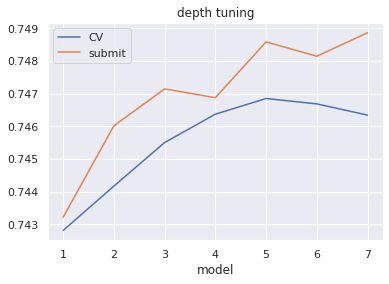

In [86]:
models = [f'{i+1}' for i in range(len(depths))]
CV_scores = depths
submit_scores = depths_sub

df = pd.DataFrame(list(zip(models, CV_scores, submit_scores)), columns=['model', 'CV', 'submit'])

ax = df.plot(x='model', y=['CV', 'submit'])
ax.set_title("depth tuning")

l2 coeff:

Text(0.5, 1.0, 'l2_leaf_reg tuning')

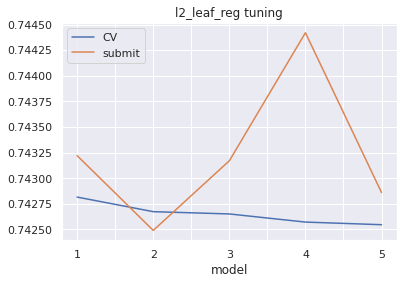

In [85]:
models = [f'{i+1}' for i in range(len(l2s))]
CV_scores = l2s
submit_scores = l2s_sub

df = pd.DataFrame(list(zip(models, CV_scores, submit_scores)), columns=['model', 'CV', 'submit'])

ax = df.plot(x='model', y=['CV', 'submit'])
ax.set_title("l2_leaf_reg tuning")

### 0) Insights: 

1) Переобучение имело место быть при варьировании learning_rate и depth, но оно было не очень сильным и все равно можно увидеть оптимальное значение.

2) изменение параметра l2_leaf_reg не оказывает эффекта на результат. Изменение значений метрики больше похоже на погрешность

### 1) GridSearchCV and RandomizedSearchCV

grid search

In [89]:
model = CatBoostClassifier(iterations=100)

In [ ]:
grid = {
    'learning_rate': [0.4, 0.5, 0.6],
    'depth':[5, 7, 10],
    'l2_leaf_reg': [5, 7, 9]
}
grid_search_results = model.grid_search(grid, train[x_cols], train["TARGET"], shuffle=False, verbose=0, plot=True)

In [91]:
grid_search_results['params']

{'depth': 5, 'l2_leaf_reg': 7, 'learning_rate': 0.5}

randomized search

In [162]:
model = CatBoostClassifier(iterations=100)

In [ ]:
param_distribution = {
    'learning_rate': stats.uniform(0, 1),
    'l2_leaf_reg': stats.bernoulli(p=0.2, loc=2),
    'depth': stats.binom(n=10, p=0.2)
}

randomized_search_results = model.randomized_search(
    param_distribution,
    train[x_cols], train["TARGET"],
    n_iter=6,
    shuffle=False,
    search_by_train_test_split=False,
    verbose=0,
    plot=True
)

In [165]:
randomized_search_results['params']

{'depth': 2.0, 'l2_leaf_reg': 2.0, 'learning_rate': 0.858554000229026}

### 1) Insights

1) {'depth': 5, 'l2_leaf_reg': 7, 'learning_rate': 0.5}

2) {'depth': 2.0, 'l2_leaf_reg': 2.0, 'learning_rate': 0.858554000229026}

### 2) Get feature importance

In [169]:
train_pool = Pool(train[x_cols], train["TARGET"])

In [ ]:
model = CatBoostClassifier(**grid_search_results['params'],
                iterations=1, random_seed=42, logging_level='Silent').fit(train_pool)
feature_importances = model.get_feature_importance(train_pool)
feature_names = x_cols

In [175]:
ax = sns.barplot(x=feature_importances, y=feature_names, palette="rocket")
ax.set_title("feature_importance")

Text(0.5, 1.0, 'feature_importance')

### 2) Insights

1) free_money, ext_source_1, ext_source_2, ext_source_3 - в порядке возрастания значимости

## Stacking

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier

### Set model 1

In [178]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)

In [188]:
cross_validation_classifier(train, x_cols, 'TARGET', RandomForestClassifier, n_estimators=10)

Fold: 1, AUC: 0.6464916616368166, LOG LOSS: 1.0097286973205617
Fold: 2, AUC: 0.6378455268460744, LOG LOSS: 1.0566207928421067
Fold: 3, AUC: 0.6396085463900714, LOG LOSS: 1.0813193444791438
Fold: 4, AUC: 0.6497553046767485, LOG LOSS: 0.9980183314853702
Fold: 5, AUC: 0.6433405451231674, LOG LOSS: 1.02578247228824
AV_AUC: 0.6434083169345757, AV_LOGLOSS: 1.0342939276830845


0.6434083169345757

### Set model 2

In [201]:
sgdc = SGDClassifier(max_iter=1000)

In [200]:
cross_validation_classifier(train, x_cols, 'TARGET', SGDClassifier, max_iter=1000, loss="log")

Fold: 1, AUC: 0.7204728425148168, LOG LOSS: 0.25578076718467274
Fold: 2, AUC: 0.7220298128916167, LOG LOSS: 0.25570203270578595
Fold: 3, AUC: 0.7207386001793208, LOG LOSS: 0.2607380723777544
Fold: 4, AUC: 0.715420252025576, LOG LOSS: 0.25561526755059977
Fold: 5, AUC: 0.7189222504875866, LOG LOSS: 0.25665221620440354
AV_AUC: 0.7195167516197835, AV_LOGLOSS: 0.2568976712046433


0.7195167516197835

### Set model 3

In [202]:
params1 = {'depth': 5, 'l2_leaf_reg': 7, 'learning_rate': 0.5}

In [203]:
cboost1 = CatBoostClassifier(**params1,
                iterations=50, random_seed=42, logging_level='Silent')

In [204]:
cross_validation_classifier(train, x_cols, 'TARGET', CatBoostClassifier, iterations=50, logging_level='Silent', **params1)

Fold: 1, AUC: 0.7517927190189957, LOG LOSS: 0.24761919448934133
Fold: 2, AUC: 0.7505488450865597, LOG LOSS: 0.24768437623053155
Fold: 3, AUC: 0.7487136658900378, LOG LOSS: 0.2528347168912782
Fold: 4, AUC: 0.7474143110965996, LOG LOSS: 0.24696494162323193
Fold: 5, AUC: 0.7490069690689931, LOG LOSS: 0.24851220468114002
AV_AUC: 0.7494953020322372, AV_LOGLOSS: 0.2487230867831046


0.7494953020322372

<b>MODEL 3 - MAIN MODEL</b>

### Set model 4

In [205]:
params2 = {'depth': 2.0, 'l2_leaf_reg': 2.0, 'learning_rate': 0.858554000229026}

In [206]:
cboost2 = CatBoostClassifier(**params2,
                iterations=50, random_seed=42, logging_level='Silent')

In [207]:
cross_validation_classifier(train, x_cols, 'TARGET', CatBoostClassifier, iterations=50, logging_level='Silent', **params2)

Fold: 1, AUC: 0.7503177653784484, LOG LOSS: 0.24811590381711285
Fold: 2, AUC: 0.7502314202709108, LOG LOSS: 0.24769833700672755
Fold: 3, AUC: 0.7467394217289482, LOG LOSS: 0.25318875124911777
Fold: 4, AUC: 0.7440532686033268, LOG LOSS: 0.24790792849973267
Fold: 5, AUC: 0.7461497392185334, LOG LOSS: 0.24932559289098638
AV_AUC: 0.7474983230400336, AV_LOGLOSS: 0.24924730269273546


0.7474983230400336

### Set model 5

In [208]:
logreg = LogisticRegression(penalty='l2',
                                class_weight='balanced',
                                solver='lbfgs',
                                C=0.04)

In [209]:
cross_validation_classifier(train, x_cols, 'TARGET', LogisticRegression, penalty='l2',
                                class_weight='balanced',
                                solver='lbfgs',
                                C=0.04)

Fold: 1, AUC: 0.7234650206159481, LOG LOSS: 0.6152683023629718
Fold: 2, AUC: 0.7233088833023669, LOG LOSS: 0.6149822453505887
Fold: 3, AUC: 0.7214196465453273, LOG LOSS: 0.6143270790359205
Fold: 4, AUC: 0.7194204236374252, LOG LOSS: 0.61383902680134
Fold: 5, AUC: 0.7215172102279277, LOG LOSS: 0.614078888974831
AV_AUC: 0.721826236865799, AV_LOGLOSS: 0.6144991085051303


0.721826236865799

### Stacking

In [210]:
X, y = train[x_cols], train["TARGET"]

estimators = [
    ('rf', rfc),
    ('sgdc', sgdc),
     ('cboost1', cboost1), 
     ('cboost2', cboost2),
     ('logreg', logreg)
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

y_score = clf.fit(X, y).predict_proba(test[x_cols])
sub = pd.read_csv("../data/raw/sample_submission.csv")
sub['TARGET'] = y_score[:, 1]
sub.to_csv("stacking1.csv", index=False)

<b>SUBMISSION SCORE: 0.74124</b>

### Remove Main model

Model number

In [211]:
X, y = train[x_cols], train["TARGET"]

estimators = [
    ('rf', rfc),
    ('svr', lsvc),
     ('cboost2', cboost2),
     ('logreg', logreg)
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

y_score = clf.fit(X, y).predict_proba(test[x_cols])
sub = pd.read_csv("../data/raw/sample_submission.csv")
sub['TARGET'] = y_score[:, 1]
sub.to_csv("stacking_without1.csv", index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

<b>SUBMISSION SCORE: 0.73681</b>

### Results

После исключения самой лучшей модели результаты упали примерно на 0.05. Это достаточно значительное ухудшение работы модели на фоне результатов каждой модели по отдельности